In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datasets import load_from_disk

In [3]:
# Load dataset (assuming it's already loaded as `dataset`)
dataset = load_from_disk("../data/open-r1/OpenR1-Math-220k_filtered_2025-03-11_16-51-49")

In [4]:
# Ensure short_tokens always stores the shorter generation
short_tokens = dataset["train"]["min_length"]
long_tokens = dataset["train"]["max_length"]

# Compute the token difference
token_diff = np.array(long_tokens) - np.array(short_tokens)

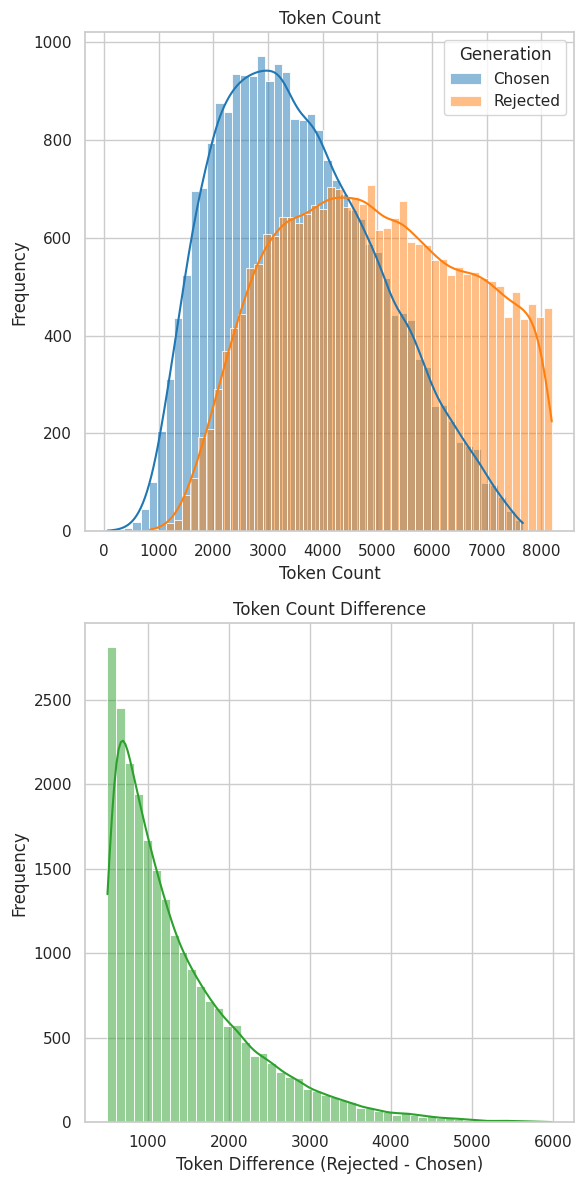

In [7]:
# Set Seaborn style
sns.set(style="whitegrid")

# Create figure and subplots
fig, axes = plt.subplots(2, 1, figsize=(6, 12))
colors = sns.color_palette("tab10")

# Plot histograms
sns.histplot(short_tokens, bins=50, kde=True, label="Chosen", color=colors[0], ax=axes[0])
sns.histplot(long_tokens, bins=50, kde=True, label="Rejected", color=colors[1], ax=axes[0])
axes[0].set_title("Token Count")
axes[0].set_xlabel("Token Count")
axes[0].set_ylabel("Frequency")
axes[0].legend(title="Generation")


sns.histplot(token_diff, bins=50, kde=True, color=colors[2], ax=axes[1])
axes[1].set_title("Token Count Difference")
axes[1].set_xlabel("Token Difference (Rejected - Chosen)")
axes[1].set_ylabel("Frequency")

# Show plots
plt.tight_layout()
plt.show()

# Dataset Statistics

In [6]:
# Extract max generation lengths into a list
max_lengths = dataset['train']['max_length']
min_lengths = dataset['train']['min_length']
length_differences = dataset['train']['length_difference']

# Compute statistics
print(f'\nStatistics for Max Generation Lengths:')
print(f'Number of samples: {len(max_lengths)}')
print(f'Min generation length: {np.min(max_lengths)}')
print(f'Max generation length: {np.max(max_lengths)}')
print(f'Mean generation length: {np.mean(max_lengths):.2f}')
print(f'Median generation length: {np.median(max_lengths)}')
print(f'Standard deviation: {np.std(max_lengths):.2f}')

print(f'\nStatistics for Min Generation Lengths:')
print(f'Number of samples: {len(min_lengths)}')
print(f'Min generation length: {np.min(min_lengths)}')
print(f'Max generation length: {np.max(min_lengths)}')
print(f'Mean generation length: {np.mean(min_lengths):.2f}')
print(f'Median generation length: {np.median(min_lengths)}')
print(f'Standard deviation: {np.std(min_lengths):.2f}')

# Calculate and print statistics for the length difference
print(f'\nStatistics for Length Difference:')
print(f'Min length difference: {np.min(length_differences)}')
print(f'Max length difference: {np.max(length_differences)}')
print(f'Mean length difference: {np.mean(length_differences):.2f}')
print(f'Median length difference: {np.median(length_differences)}')
print(f'Standard deviation (length differences): {np.std(length_differences):.2f}')


Statistics for Max Generation Lengths:
Number of samples: 24242
Min generation length: 841
Max generation length: 8192
Mean generation length: 4961.73
Median generation length: 4887.0
Standard deviation: 1720.01

Statistics for Min Generation Lengths:
Number of samples: 24242
Min generation length: 62
Max generation length: 7663
Mean generation length: 3565.17
Median generation length: 3400.5
Standard deviation: 1456.19

Statistics for Length Difference:
Min length difference: 500
Max length difference: 5988
Mean length difference: 1396.57
Median length difference: 1131.0
Standard deviation (length differences): 849.16
